In [33]:
#1 zad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mtcars = pd.read_csv('mtcars.csv')

mtcars1=mtcars.sort_values(by=['mpg'],ascending=False);
print(mtcars1.head(5))
#print(pd.DataFrame(mtcars1, columns=['car']).head(5)) 

mtcars2=(mtcars[mtcars.cyl == 8]) 
mtcars2=mtcars2.sort_values(by=['mpg']);
print(mtcars2.head(3)) 
#print(pd.DataFrame(mtcars2, columns=['car']).head(3)) 

mtcars3=(mtcars[mtcars.cyl == 6]) 
mtcars3=mtcars3['mpg'].mean()
print(mtcars3)

mtcars4=mtcars[(mtcars.cyl == 4) & (mtcars.wt > 2) & (mtcars.wt < 2.2)];
mtcars4=mtcars4['mpg'].mean()
print(mtcars4)

mtcarsManual=(mtcars[mtcars.am == 1]).car.count()
print(mtcarsManual)
mtcarsAutomatic=(mtcars[mtcars.am == 0]).car.count()
print(mtcarsAutomatic)

mtcars6=mtcars[(mtcars.am == 1) & (mtcars.hp > 100)].car.count()
print(mtcars6)

mtcars['wt']/=2
print(pd.DataFrame(mtcars, columns=['wt']))

               car   mpg  cyl  disp   hp  drat     wt   qsec  vs  am  gear  \
19  Toyota Corolla  33.9    4  71.1   65  4.22  1.835  19.90   1   1     4   
17        Fiat 128  32.4    4  78.7   66  4.08  2.200  19.47   1   1     4   
27    Lotus Europa  30.4    4  95.1  113  3.77  1.513  16.90   1   1     5   
18     Honda Civic  30.4    4  75.7   52  4.93  1.615  18.52   1   1     4   
25       Fiat X1-9  27.3    4  79.0   66  4.08  1.935  18.90   1   1     4   

    carb  
19     1  
17     1  
27     2  
18     2  
25     1  
                    car   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
23           Camaro Z28  13.3    8  350.0  245  3.73  3.840  15.41   0   0   

    gear  carb  
14     3     4  
15     3     4  
23     3     4  
19.74285714285714
26.0
19
13
7
        wt
0   1.3100
1   1.4375
2   1.1600
3   1.607

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


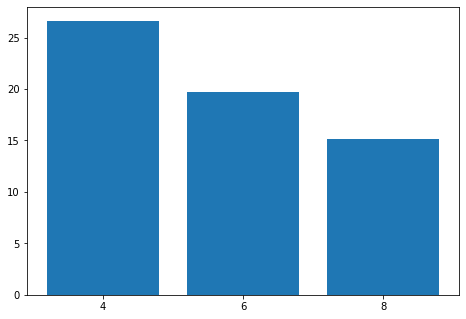

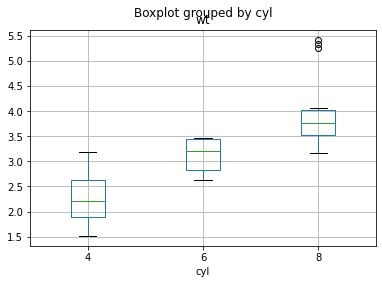

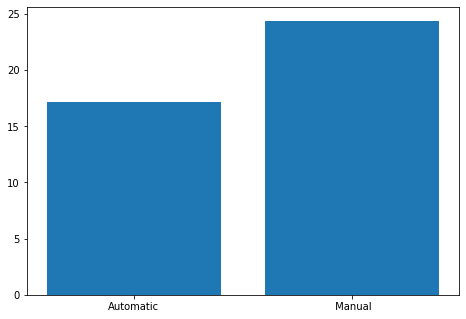

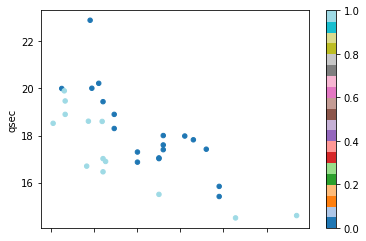

In [53]:
#2 zad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mtcars = pd.read_csv('mtcars.csv')

mtcars4=mtcars.query('cyl==4')['mpg'].mean()
mtcars6=mtcars.query('cyl==6')['mpg'].mean()
mtcars8=mtcars.query('cyl==8')['mpg'].mean()
figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
x = ['4','6','8']
y = [mtcars4,mtcars6,mtcars8]
ax.bar(x,y)

mtcars2=mtcars.boxplot(column=['wt'],by='cyl')

mtcarsAutomatic=mtcars.query('am==0')['mpg'].mean()
mtcarsManual=mtcars.query('am==1')['mpg'].mean()

figure1 = plt.figure()
ax1 = figure1.add_axes([0,0,1,1])
x1 = ['Automatic',' Manual']
y1 = [mtcarsAutomatic,mtcarsManual]
ax1.bar(x1,y1)

ax2=mtcars.plot.scatter(x='hp',y='qsec',c=mtcars['am'],cmap='tab20')

Three Biggest PM10 By Year 
20   2017-01-21 23:00:00+00:00
19   2017-01-20 23:00:00+00:00
28   2017-01-29 23:00:00+00:00
Name: time, dtype: datetime64[ns, UTC]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


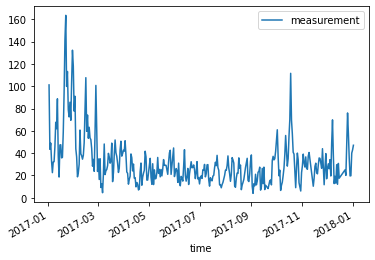

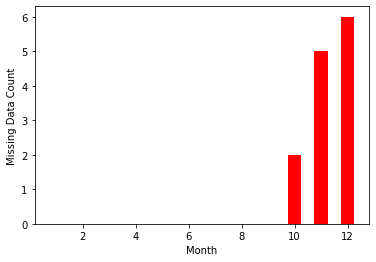

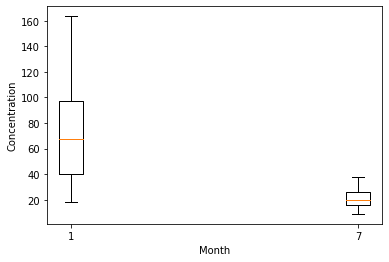

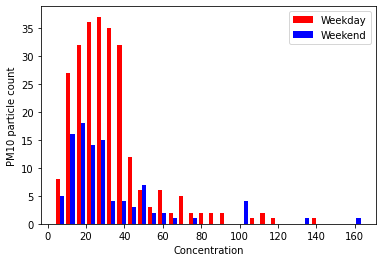

In [67]:
import urllib.request
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np

url = "http://iszz.azo.hr/iskzl/rs/podatak/export/xml?postaja=160&polutant=5&tipPodatka=5&vrijemeOd=02.01.2017&vrijemeDo=01.01.2018"

airQualityHR = urllib.request.urlopen(url).read()
root = ET.fromstring(airQualityHR)

df = pd.DataFrame(columns=('measurement', 'time'))

i = 0
children = list(root)
while True:
    try:
        
        obj = list(children[i])
    except:
        break
        
    row = dict(zip(['measurement', 'time'], [obj[0].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    df.measurement[i] = float(df.measurement[i])
    i = i + 1
df.time = pd.to_datetime(df.time,utc=True)
df.plot(y='measurement', x='time');

df['month'] = pd.DatetimeIndex(df['time']).month
df['dayOfweek'] = pd.DatetimeIndex(df['time']).dayofweek

ThreeBiggestPM10ByYear = df.sort_values(by=['measurement'], ascending = False)
print("Three Biggest PM10 By Year ")
print(ThreeBiggestPM10ByYear['time'].head(3))

index=np.arange(1,13,1)
empty=[]
for i in range(1,13):   
    mjesec= df[df.month==i]
    if (i==1) or (i==3) or(i==5) or(i==7) or (i==8) or (i==10) or (i==12):
        empty.append(31-len(mjesec))  
    elif (i==4) or (i==6) or(i==9) or(i==11):
        empty.append(30-len(mjesec))  
    else:
        empty.append(28-len(mjesec)) 

plt.figure()
plt.bar(index,empty,0.5,color=(1,0,0))  
plt.xlabel("Month")
plt.ylabel("Missing Data Count")

january=df[df.month==1]
july=df[df.month==7]
januaryData= []
julyData = []

for i in january['measurement']:
    januaryData.append(i)
for i in july['measurement']:
    julyData.append(i)
    
plt.figure()
plt.boxplot([januaryData, julyData], positions = [1,7]) 
plt.xlabel('Month')
plt.ylabel('Concentration')

weekdays=[]
weekend=[]
wd = df[(df.dayOfweek == 0)|(df.dayOfweek == 1)|(df.dayOfweek == 2)|(df.dayOfweek == 3)|(df.dayOfweek == 4)]
we = df[(df.dayOfweek == 5)|(df.dayOfweek == 6)]
for i in we['measurement']:
    weekend.append(i)
for i in wd['measurement']:
    weekdays.append(i)
    
bins=30
plt.figure()
plt.hist([weekdays,weekend],bins,color = ['red','blue'])
plt.xlabel("Concentration")
plt.ylabel("PM10 particle count")
plt.legend(['Weekday','Weekend'],loc=1)